In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# import mglearn
import numpy.random as npr
from IPython.display import HTML
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer

# train test split and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files


uploaded = files.upload()


Saving Uterine Corpus Endometrial Carcinoma.csv to Uterine Corpus Endometrial Carcinoma.csv


In [3]:
df_uterine= pd.read_csv('Uterine Corpus Endometrial Carcinoma.csv')
df_uterine

,Patient ID,Sample ID,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
0,TCGA-2E-A9G8,TCGA-2E-A9G8-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,TCGA-4E-A92E,TCGA-4E-A92E-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,TCGA-5B-A90C,TCGA-5B-A90C-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,TCGA-A5-A0G1,TCGA-A5-A0G1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,White,UCEC_POLE,Serous Endometrial Adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,TCGA-QS-A8F1,TCGA-QS-A8F1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,NaN,1:DEAD WITH TUMOR,63.0,0.6549,85.0,0.3647,0.15,Black or African American,UCEC_CN_HIGH,Serous Endometrial Adenocarcinoma
525,TCGA-SJ-A6ZI,TCGA-SJ-A6ZI-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.0275,64.0,0.6138,14.35,Black or African American,UCEC_MSI,Endometrioid Endometrial Adenocarcinoma
526,TCGA-SJ-A6ZJ,TCGA-SJ-A6ZJ-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,56.0,0.0466,61.0,0.3382,0.00,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
527,TCGA-SL-A6J9,TCGA-SL-A6J9-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,48.0,0.4226,73.0,0.3503,0.03,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma


In [4]:
df_uterine.describe()

,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score
count,515.000000,519.000000,526.00000,526.000000,528.000000
mean,1046.423301,0.185959,63.76616,0.438948,6.395890
std,2734.365494,0.226088,11.06003,0.239666,10.175853
min,7.000000,0.000000,31.00000,0.237000,0.000000
25%,47.000000,0.003600,57.00000,0.283950,0.110000
50%,76.000000,0.067800,64.00000,0.311300,0.435000
75%,563.500000,0.314450,71.00000,0.543225,10.117500
max,25696.000000,0.948700,90.00000,1.304900,40.430000


<Axes: xlabel='Overall Survival Status', ylabel='Diagnosis Age'>

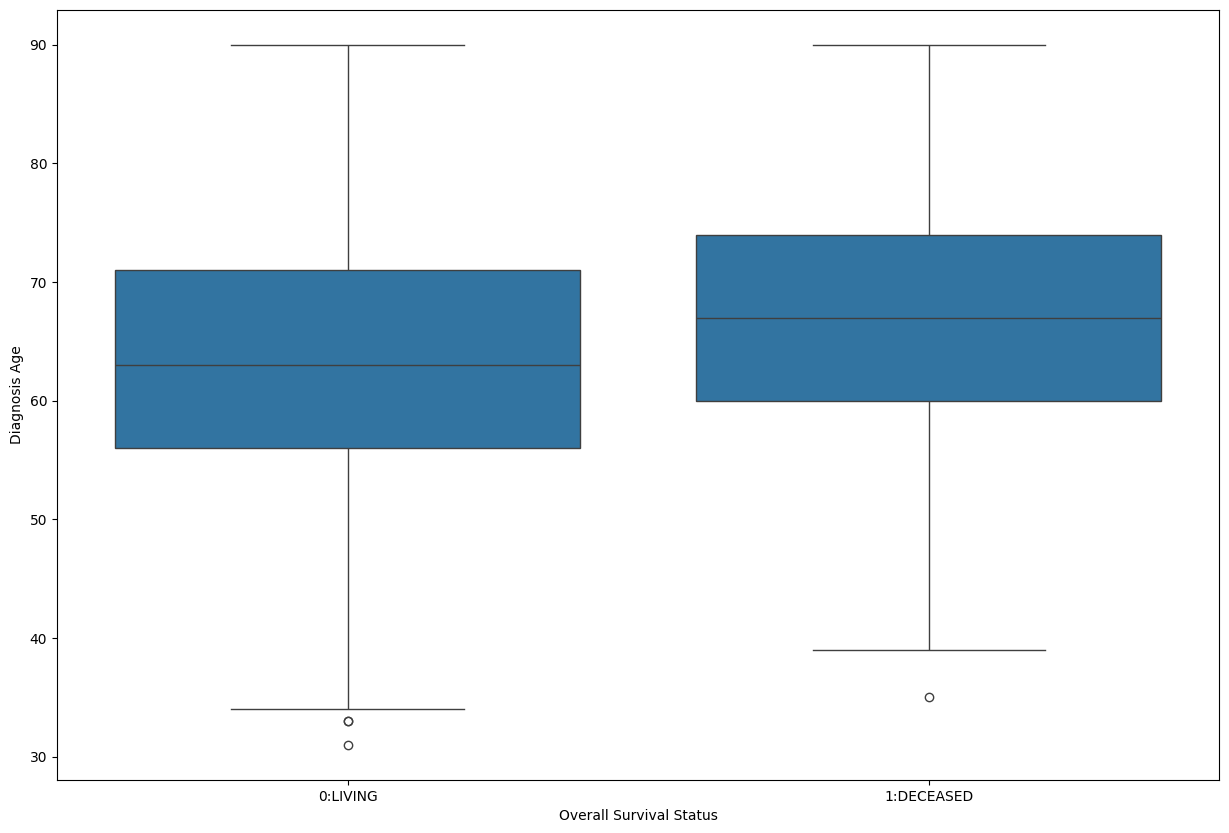

In [5]:
#Overall Survival Status by Diagnosis Age. The visualization below implicates that
plt.figure(figsize=(15,10))
sns.boxplot(df_uterine, x='Overall Survival Status', y='Diagnosis Age')

In [6]:
new_uterine= df_uterine.drop(['Patient ID', 'Sample ID', 'Race Category', 'Overall Survival Status', 'Disease Free Status'], axis=1)

In [7]:
le= LabelEncoder()
new_uterine.loc[:, 'Disease-specific Survival status'] = le.fit_transform(new_uterine['Disease-specific Survival status'])
new_uterine = pd.get_dummies(new_uterine, columns=['Cancer Type Detailed', 'Subtype', 'Tumor Type'], drop_first=True)

In [8]:
new_uterine

,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Cancer Type Detailed_Uterine Mixed Endometrial Carcinoma,Cancer Type Detailed_Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma,Subtype_UCEC_CN_LOW,Subtype_UCEC_MSI,Subtype_UCEC_POLE,Tumor Type_Mixed Serous and Endometrioid Carcinoma,Tumor Type_Serous Endometrial Adenocarcinoma
0,0,65.0,0.3311,59.0,0.3234,0.85,0,0,0,0,0,0,0
1,0,147.0,0.0341,54.0,0.3396,0.01,0,0,1,0,0,0,0
2,0,45.0,0.6903,69.0,0.3344,0.55,0,0,0,0,0,0,0
3,0,50.0,0.0581,51.0,0.3199,0.09,0,0,1,0,0,0,0
4,0,10808.0,0.0001,67.0,0.3108,1.74,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,1,63.0,0.6549,85.0,0.3647,0.15,0,1,0,0,0,0,1
525,0,1306.0,0.0275,64.0,0.6138,14.35,0,0,0,1,0,0,0
526,0,56.0,0.0466,61.0,0.3382,0.00,0,0,1,0,0,0,0
527,0,48.0,0.4226,73.0,0.3503,0.03,0,0,0,0,0,0,0


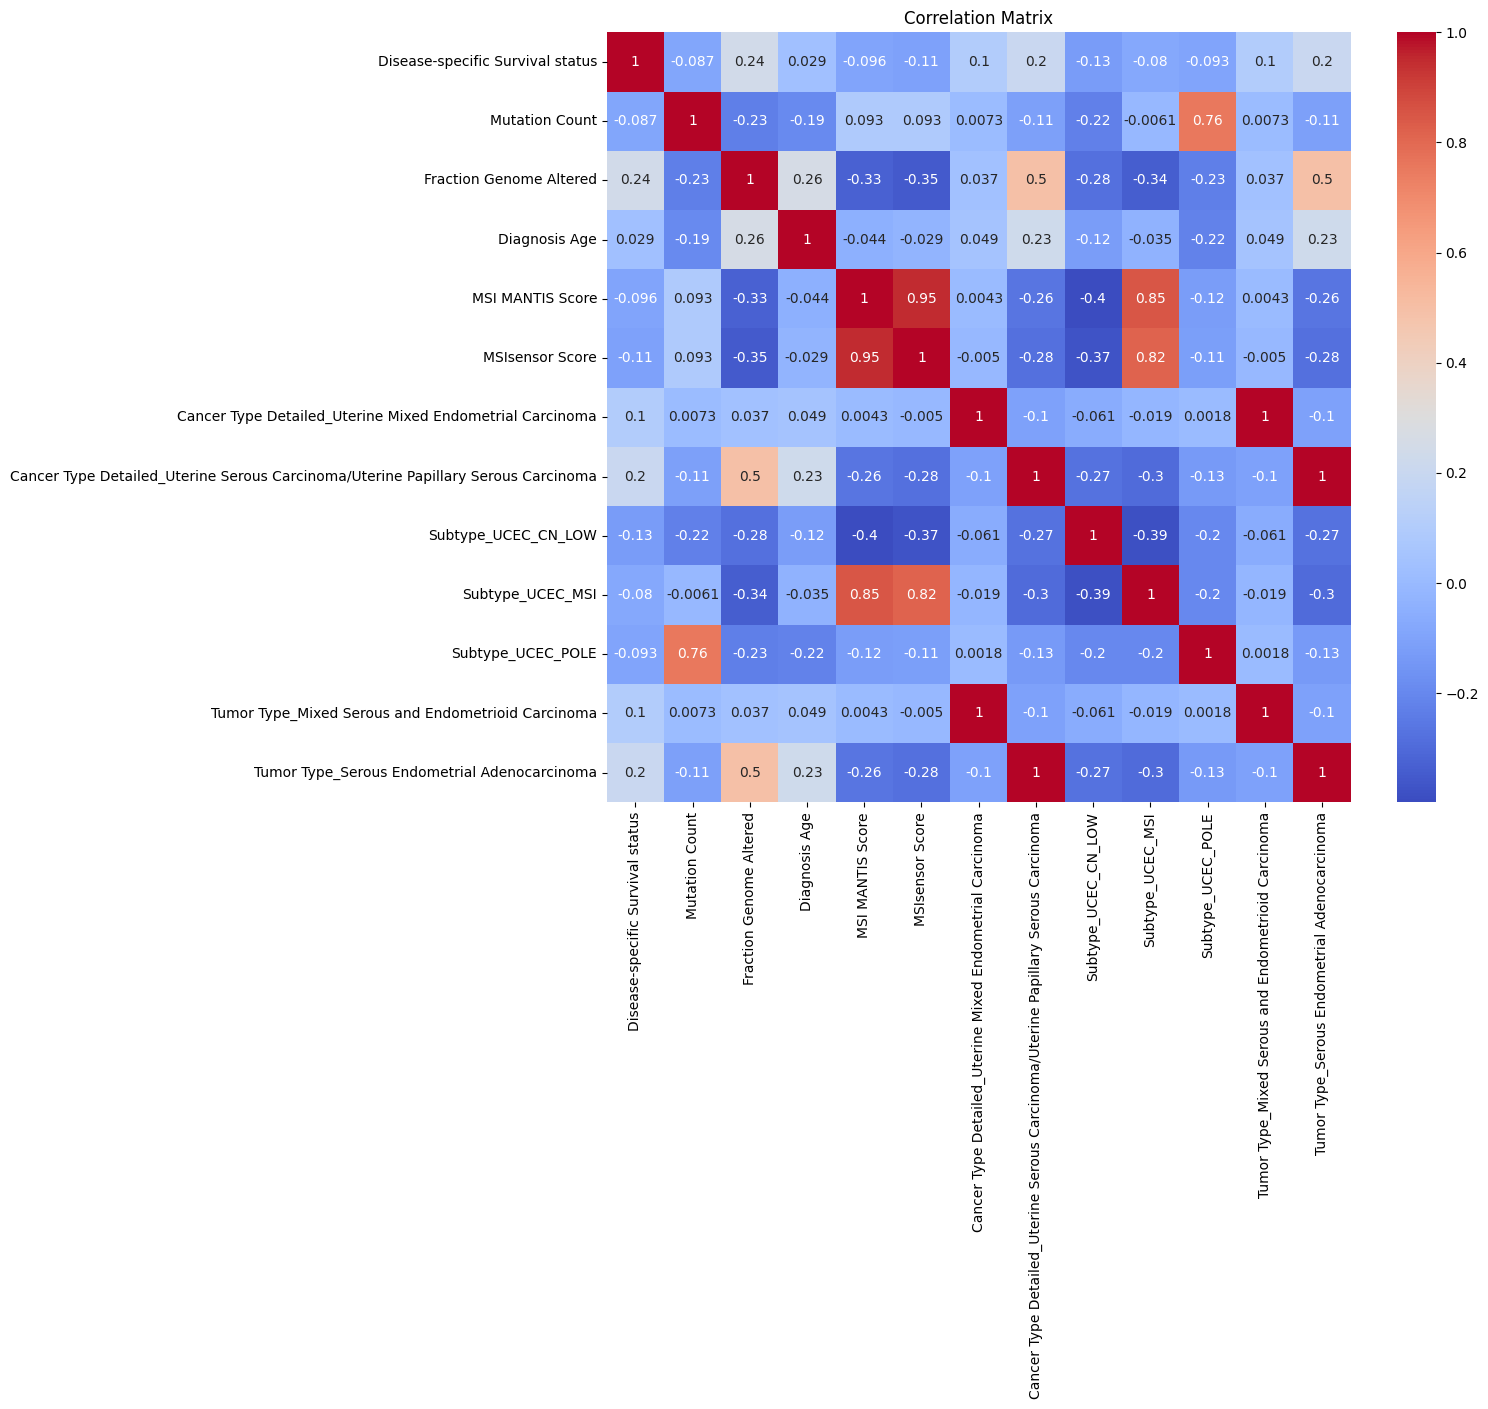

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(new_uterine.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
new_uterine.describe()

,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Cancer Type Detailed_Uterine Mixed Endometrial Carcinoma,Cancer Type Detailed_Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma,Subtype_UCEC_CN_LOW,Subtype_UCEC_MSI,Subtype_UCEC_POLE,Tumor Type_Mixed Serous and Endometrioid Carcinoma,Tumor Type_Serous Endometrial Adenocarcinoma
count,529.000000,515.000000,519.000000,526.00000,526.000000,528.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.117202,1046.423301,0.185959,63.76616,0.438948,6.395890,0.039698,0.206049,0.277883,0.279773,0.092628,0.039698,0.206049
std,0.333523,2734.365494,0.226088,11.06003,0.239666,10.175853,0.195432,0.404849,0.448379,0.449313,0.290184,0.195432,0.404849
min,0.000000,7.000000,0.000000,31.00000,0.237000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,47.000000,0.003600,57.00000,0.283950,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,76.000000,0.067800,64.00000,0.311300,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,563.500000,0.314450,71.00000,0.543225,10.117500,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,25696.000000,0.948700,90.00000,1.304900,40.430000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


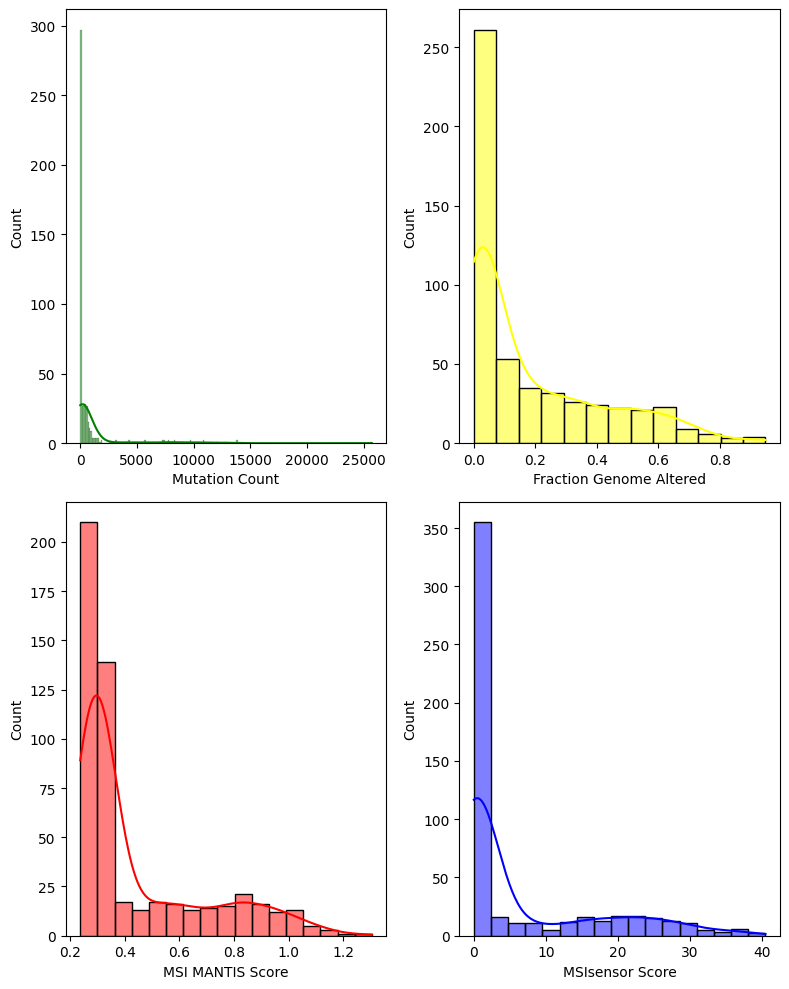

In [11]:
fig, axes= plt.subplots(2,2, figsize=(8,10))
sns.histplot(new_uterine, x='Mutation Count', kde=True, color='green', ax= axes[0,0])
sns.histplot(new_uterine, x='Fraction Genome Altered', kde=True, color='yellow', ax= axes[0,1])
sns.histplot(new_uterine, x='MSI MANTIS Score', kde=True, color='red', ax= axes[1,0])
sns.histplot(new_uterine, x='MSIsensor Score', kde=True, color='blue', ax= axes[1,1])
fig.tight_layout()

In [12]:
feature_df=df_uterine.drop(['Patient ID', 'Sample ID', 'Race Category', 'Overall Survival Status', 'Disease Free Status'], axis=1)
feature_df

,Cancer Type Detailed,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Subtype,Tumor Type
0,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,UCEC_POLE,Serous Endometrial Adenocarcinoma
...,...,...,...,...,...,...,...,...,...
524,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DEAD WITH TUMOR,63.0,0.6549,85.0,0.3647,0.15,UCEC_CN_HIGH,Serous Endometrial Adenocarcinoma
525,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.0275,64.0,0.6138,14.35,UCEC_MSI,Endometrioid Endometrial Adenocarcinoma
526,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,56.0,0.0466,61.0,0.3382,0.00,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
527,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,48.0,0.4226,73.0,0.3503,0.03,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma


In [13]:
feature_df.describe()

,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score
count,515.000000,519.000000,526.00000,526.000000,528.000000
mean,1046.423301,0.185959,63.76616,0.438948,6.395890
std,2734.365494,0.226088,11.06003,0.239666,10.175853
min,7.000000,0.000000,31.00000,0.237000,0.000000
25%,47.000000,0.003600,57.00000,0.283950,0.110000
50%,76.000000,0.067800,64.00000,0.311300,0.435000
75%,563.500000,0.314450,71.00000,0.543225,10.117500
max,25696.000000,0.948700,90.00000,1.304900,40.430000


In [14]:
feature_df.isnull().sum()

Cancer Type Detailed                 0
Disease-specific Survival status     2
Mutation Count                      14
Fraction Genome Altered             10
Diagnosis Age                        3
MSI MANTIS Score                     3
MSIsensor Score                      1
Subtype                             22
Tumor Type                           0
dtype: int64

In [15]:
feature_df.loc[feature_df['MSI MANTIS Score']> 0.543225, 'Subtype']= 'Subtype_UCEC_MSI'
feature_df.loc[feature_df['Mutation Count']> 563, 'Subtype']= 'Subtype_UCEC_POLE'
feature_df

,Cancer Type Detailed,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Subtype,Tumor Type
0,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,Subtype_UCEC_POLE,Serous Endometrial Adenocarcinoma
...,...,...,...,...,...,...,...,...,...
524,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DEAD WITH TUMOR,63.0,0.6549,85.0,0.3647,0.15,UCEC_CN_HIGH,Serous Endometrial Adenocarcinoma
525,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.0275,64.0,0.6138,14.35,Subtype_UCEC_POLE,Endometrioid Endometrial Adenocarcinoma
526,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,56.0,0.0466,61.0,0.3382,0.00,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
527,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,48.0,0.4226,73.0,0.3503,0.03,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma


In [16]:
feature_df['Subtype'].fillna('Subtype_UCEC_CN_LOW', inplace=True)
feature_df

,Cancer Type Detailed,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Subtype,Tumor Type
0,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,Subtype_UCEC_POLE,Serous Endometrial Adenocarcinoma
...,...,...,...,...,...,...,...,...,...
524,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DEAD WITH TUMOR,63.0,0.6549,85.0,0.3647,0.15,UCEC_CN_HIGH,Serous Endometrial Adenocarcinoma
525,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.0275,64.0,0.6138,14.35,Subtype_UCEC_POLE,Endometrioid Endometrial Adenocarcinoma
526,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,56.0,0.0466,61.0,0.3382,0.00,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
527,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,48.0,0.4226,73.0,0.3503,0.03,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma


In [17]:
feature_df.isnull().sum()

Cancer Type Detailed                 0
Disease-specific Survival status     2
Mutation Count                      14
Fraction Genome Altered             10
Diagnosis Age                        3
MSI MANTIS Score                     3
MSIsensor Score                      1
Subtype                              0
Tumor Type                           0
dtype: int64

In [18]:
feature_df.loc[feature_df['Subtype']=='Subtype_UCEC_POLE', 'Mutation Count'].fillna(feature_df.loc[feature_df['Subtype']=='Subtype_UCEC_POLE', 'Mutation Count'].mean(), inplace=True)
feature_df

,Cancer Type Detailed,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Subtype,Tumor Type
0,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,Subtype_UCEC_POLE,Serous Endometrial Adenocarcinoma
...,...,...,...,...,...,...,...,...,...
524,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DEAD WITH TUMOR,63.0,0.6549,85.0,0.3647,0.15,UCEC_CN_HIGH,Serous Endometrial Adenocarcinoma
525,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.0275,64.0,0.6138,14.35,Subtype_UCEC_POLE,Endometrioid Endometrial Adenocarcinoma
526,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,56.0,0.0466,61.0,0.3382,0.00,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
527,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,48.0,0.4226,73.0,0.3503,0.03,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma


In [19]:
feature_df.loc[feature_df['Tumor Type']=='Serous Endometrial Adenocarcinoma', 'Fraction Genome Altered'].fillna(feature_df.loc[feature_df['Tumor Type']=='Serous Endometrial Adenocarcinoma', 'Fraction Genome Altered'].mean(), inplace=True)
feature_df

,Cancer Type Detailed,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Subtype,Tumor Type
0,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,Subtype_UCEC_POLE,Serous Endometrial Adenocarcinoma
...,...,...,...,...,...,...,...,...,...
524,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DEAD WITH TUMOR,63.0,0.6549,85.0,0.3647,0.15,UCEC_CN_HIGH,Serous Endometrial Adenocarcinoma
525,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.0275,64.0,0.6138,14.35,Subtype_UCEC_POLE,Endometrioid Endometrial Adenocarcinoma
526,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,56.0,0.0466,61.0,0.3382,0.00,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
527,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,48.0,0.4226,73.0,0.3503,0.03,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma


In [20]:
feature_df['Disease-specific Survival status'].value_counts()

0:ALIVE OR DEAD TUMOR FREE    469
1:DEAD WITH TUMOR              58
Name: Disease-specific Survival status, dtype: int64

In [21]:
feature_df= feature_df.dropna(subset=['Disease-specific Survival status', 'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score'])

In [22]:
feature_df.isnull().sum()

Cancer Type Detailed                 0
Disease-specific Survival status     0
Mutation Count                      13
Fraction Genome Altered             10
Diagnosis Age                        0
MSI MANTIS Score                     0
MSIsensor Score                      0
Subtype                              0
Tumor Type                           0
dtype: int64

In [23]:
feature_df['Mutation Count'] = feature_df['Mutation Count'].fillna(feature_df.groupby('Subtype')['Mutation Count'].transform('mean'))
feature_df

,Cancer Type Detailed,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Subtype,Tumor Type
0,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,Subtype_UCEC_POLE,Serous Endometrial Adenocarcinoma
...,...,...,...,...,...,...,...,...,...
524,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DEAD WITH TUMOR,63.0,0.6549,85.0,0.3647,0.15,UCEC_CN_HIGH,Serous Endometrial Adenocarcinoma
525,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.0275,64.0,0.6138,14.35,Subtype_UCEC_POLE,Endometrioid Endometrial Adenocarcinoma
526,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,56.0,0.0466,61.0,0.3382,0.00,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
527,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,48.0,0.4226,73.0,0.3503,0.03,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma


In [24]:
feature_df['Fraction Genome Altered'] = feature_df['Fraction Genome Altered'].fillna(feature_df.groupby('Tumor Type')['Fraction Genome Altered'].transform('mean'))
feature_df

,Cancer Type Detailed,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Subtype,Tumor Type
0,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,Subtype_UCEC_POLE,Serous Endometrial Adenocarcinoma
...,...,...,...,...,...,...,...,...,...
524,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DEAD WITH TUMOR,63.0,0.6549,85.0,0.3647,0.15,UCEC_CN_HIGH,Serous Endometrial Adenocarcinoma
525,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.0275,64.0,0.6138,14.35,Subtype_UCEC_POLE,Endometrioid Endometrial Adenocarcinoma
526,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,56.0,0.0466,61.0,0.3382,0.00,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
527,Uterine Endometrioid Carcinoma,0:ALIVE OR DEAD TUMOR FREE,48.0,0.4226,73.0,0.3503,0.03,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma


In [25]:
feature_df.isnull().sum()

Cancer Type Detailed                0
Disease-specific Survival status    0
Mutation Count                      0
Fraction Genome Altered             0
Diagnosis Age                       0
MSI MANTIS Score                    0
MSIsensor Score                     0
Subtype                             0
Tumor Type                          0
dtype: int64

In [26]:
num_features = ['Mutation Count', 'Fraction Genome Altered', 'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score']
categorical_feats = ['Cancer Type Detailed', 'Tumor Type', 'Subtype']

In [27]:
ct = ColumnTransformer(
    transformers=
    [
        ("onehot", OneHotEncoder(), categorical_feats),
    ],
    remainder='passthrough'
)

In [28]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Cancer Type Detailed', 'Tumor Type',
                                  'Subtype'])])

In [29]:
X= feature_df.drop('Disease-specific Survival status', axis=1)
y= feature_df['Disease-specific Survival status']

In [30]:
#Encoding values of X
X_encoded= ct.fit_transform(X)

In [31]:
class_balancing= SMOTE(random_state=42)
X_balanced, y_balanced= class_balancing.fit_resample(X_encoded, y)

In [38]:
#splitting the data into training and test data
X_train, X_test, y_train, y_test= train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
scaling= StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [39]:
classification= RandomForestClassifier(random_state=42)
classification.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
classification2= RandomForestClassifier(max_depth=1, random_state=50)
classification2.fit(X_train, y_train)

classification3= RandomForestClassifier(max_depth=5, random_state=100)
classification3.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=100)

In [41]:
target_predict= classification.predict(X_test)
target_predict2= classification2.predict(X_test)
target_predict3= classification3.predict(X_test)

In [42]:
accuracy1= accuracy_score(y_test, target_predict)
accuracy2= accuracy_score(y_test, target_predict2)
accuracy3= accuracy_score(y_test, target_predict3)
print(accuracy1)
print(accuracy2)
print(accuracy3)

0.9193548387096774
0.7741935483870968
0.8655913978494624


In [46]:
report= classification_report(y_test,target_predict2)
print(report)

                            precision    recall  f1-score   support

0:ALIVE OR DEAD TUMOR FREE       0.78      0.80      0.79        98
         1:DEAD WITH TUMOR       0.77      0.75      0.76        88

                  accuracy                           0.77       186
                 macro avg       0.77      0.77      0.77       186
              weighted avg       0.77      0.77      0.77       186

